In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## importação da base

In [3]:
path_csv_ml = 'd:/tcc_puc_minas/dataframe_final/df_ml.csv'

df = pd.read_csv(path_csv_ml,sep='|')

In [4]:
display(df)
display(df.dtypes)

,customer_city,customer_state,pib_mun_customer,atividade_mun_customer,seller_city,seller_state,pib_mun_seller,atividade_mun_seller,product_category_name,product_photos_qty,payment_type,dias_entrega,price,freight_value,review_score
0,franca,SP,9.992981e+06,demais servicos,itaquaquecetuba,SP,7.212560e+06,demais servicos,moveis_escritorio,1.0,credit_card,8,124.99,21.88,1
1,sao bernardo do campo,SP,5.056869e+07,demais servicos,itajai,SC,2.541343e+07,comercio e reparacao de veiculos automotores e...,utilidades_domesticas,3.0,credit_card,16,289.00,46.48,1
2,sao paulo,SP,7.146834e+08,demais servicos,itaquaquecetuba,SP,7.212560e+06,demais servicos,moveis_escritorio,1.0,credit_card,26,139.94,17.79,1
3,mogi das cruzes,SP,1.538650e+07,demais servicos,itaquaquecetuba,SP,7.212560e+06,demais servicos,moveis_escritorio,1.0,credit_card,14,149.94,23.36,1
4,campinas,SP,6.139726e+07,demais servicos,ibitinga,SP,1.523757e+06,demais servicos,casa_conforto,1.0,credit_card,11,230.00,22.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104583,sao paulo,SP,7.146834e+08,demais servicos,garca,SP,1.192416e+06,demais servicos,livros_interesse_geral,2.0,credit_card,6,74.90,13.88,1
104584,taboao da serra,SP,8.378881e+06,demais servicos,araraquara,SP,9.409114e+06,demais servicos,esporte_lazer,1.0,credit_card,7,114.90,14.16,1
104585,fortaleza,CE,6.702409e+07,demais servicos,sao paulo,SP,7.146834e+08,demais servicos,beleza_saude,1.0,credit_card,30,37.00,19.04,0
104586,canoas,RS,1.917761e+07,demais servicos,guariba,SP,8.998065e+05,demais servicos,relogios_presentes,1.0,credit_card,12,689.00,22.07,1


customer_city              object
customer_state             object
pib_mun_customer          float64
atividade_mun_customer     object
seller_city                object
seller_state               object
pib_mun_seller            float64
atividade_mun_seller       object
product_category_name      object
product_photos_qty        float64
payment_type               object
dias_entrega                int64
price                     float64
freight_value             float64
review_score                int64
dtype: object

## transformação das variáveis categóricas para numéricas utilizando o método LabelEncoder()

In [5]:
# LableEncoder para codificar as variaveis categoricas como numeros

encoder = preprocessing.LabelEncoder()

In [6]:
for col in list(df.columns):
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

In [7]:
display(df.dtypes)

customer_city               int32
customer_state              int32
pib_mun_customer          float64
atividade_mun_customer      int32
seller_city                 int32
seller_state                int32
pib_mun_seller            float64
atividade_mun_seller        int32
product_category_name       int32
product_photos_qty        float64
payment_type                int32
dias_entrega                int64
price                     float64
freight_value             float64
review_score                int64
dtype: object

## Separação da variáveis preditoras e da variável de resultado

In [8]:
# variavel resultado

y = df['review_score'].copy()

print(y)

0         1
1         1
2         1
3         1
4         1
         ..
104583    1
104584    1
104585    0
104586    1
104587    1
Name: review_score, Length: 104588, dtype: int64


In [9]:
# variaveis preditoras

X = df.drop(columns='review_score').copy()

display(X)

,customer_city,customer_state,pib_mun_customer,atividade_mun_customer,seller_city,seller_state,pib_mun_seller,atividade_mun_seller,product_category_name,product_photos_qty,payment_type,dias_entrega,price,freight_value
0,1266,25,9.992981e+06,4,226,21,7.212560e+06,3,55,1.0,1,8,124.99,21.88
1,3148,25,5.056869e+07,4,217,19,2.541343e+07,2,72,3.0,1,16,289.00,46.48
2,3300,25,7.146834e+08,4,226,21,7.212560e+06,3,55,1.0,1,26,139.94,17.79
3,2162,25,1.538650e+07,4,226,21,7.212560e+06,3,55,1.0,1,14,149.94,23.36
4,643,25,6.139726e+07,4,196,21,1.523757e+06,3,14,1.0,1,11,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104583,3300,25,7.146834e+08,4,175,21,1.192416e+06,3,48,2.0,1,6,74.90,13.88
104584,3467,25,8.378881e+06,4,21,21,9.409114e+06,3,32,1.0,1,7,114.90,14.16
104585,1259,5,6.702409e+07,4,439,21,7.146834e+08,3,11,1.0,1,30,37.00,19.04
104586,705,22,1.917761e+07,4,188,21,8.998065e+05,3,66,1.0,1,12,689.00,22.07


In [10]:
display(X.columns)

Index(['customer_city', 'customer_state', 'pib_mun_customer',
       'atividade_mun_customer', 'seller_city', 'seller_state',
       'pib_mun_seller', 'atividade_mun_seller', 'product_category_name',
       'product_photos_qty', 'payment_type', 'dias_entrega', 'price',
       'freight_value'],
      dtype='object')

## Separação dos dados de treinamento e dados de teste

In [11]:
# separação da base de teste (20% do total de linhas) e da base de teste (80% do total de linhas)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 11)

print(len(X_train)/len(df)*100)

79.99961754694611


In [12]:
print(X_train.shape)
print(X_test.shape)

(83670, 14)
(20918, 14)


In [13]:
print(y_train.shape)
print(y_test.shape)

(83670,)
(20918,)


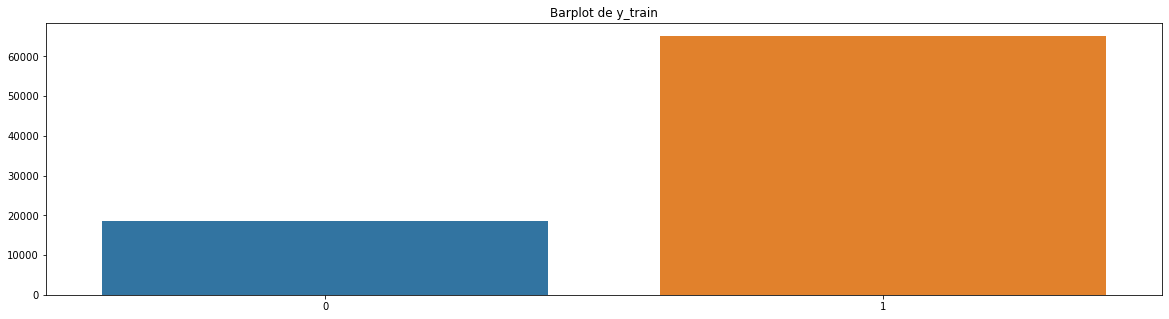

In [14]:
fig = plt.figure(figsize=(20,5))
plt.title('Barplot de {}'.format('y_train'))
y_train_series = y_train.value_counts()
sns.barplot(x=y_train_series.index,y=y_train_series.values)
plt.show()

## Balanceamento da base de treinamento através da técnima SMOTE

In [15]:
sm = SMOTE(random_state=10)

X_train, y_train = sm.fit_resample(X_train,y_train)

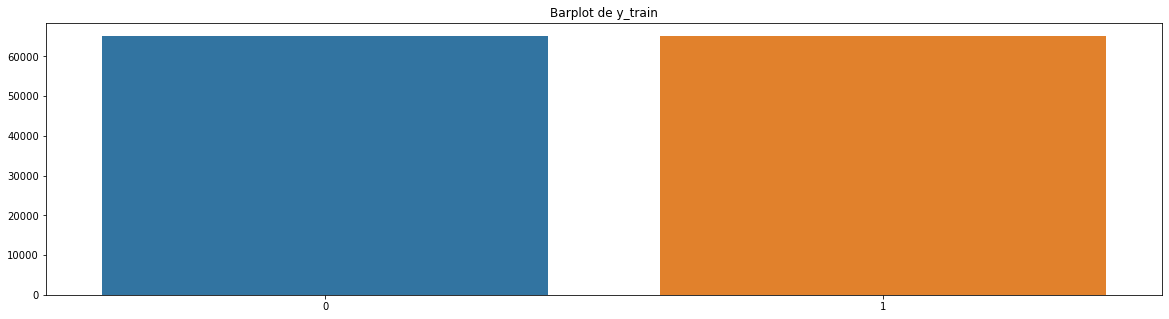

In [16]:
fig = plt.figure(figsize=(20,5))
plt.title('Barplot de {}'.format('y_train'))
y_train_series = y_train.value_counts()
sns.barplot(x=y_train_series.index,y=y_train_series.values)
plt.show()

## Treinamento o modelo Arvore de Decisão e os resultados

In [17]:
arvore_decisao = DecisionTreeClassifier(random_state=11)
arvore_decisao = arvore_decisao.fit(X_train,y_train)
y_pred_ad = arvore_decisao.predict(X_test)

In [18]:
def model_results(modelo,X_test,y_test,y_pred):
    # confusion matrix

    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    print('tn:',tn)
    print('fp:',fp)
    print('fn:',fn)
    print('tp:',tp)

    print('\n')

    print(confusion_matrix(y_test,y_pred))

    print('\n')

    soma_pred_true = tp+fp+fn+tn

    print('soma tp,fp,fn,tp: ', soma_pred_true)
    print('len y_test: ',len(y_test))

    plot_confusion_matrix(modelo,X_test,y_test, labels=[1,0], cmap='Blues')
    plt.show()

    # resultados com classification_report
    print('classification report:','\n', classification_report(y_test,y_pred))

tn: 2076
fp: 2633
fn: 3754
tp: 12455


[[ 2076  2633]
 [ 3754 12455]]


soma tp,fp,fn,tp:  20918
len y_test:  20918


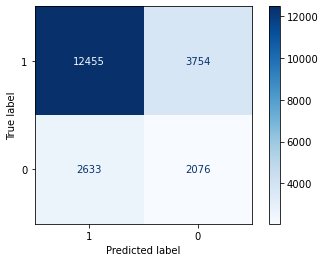

classification report: 
               precision    recall  f1-score   support

           0       0.36      0.44      0.39      4709
           1       0.83      0.77      0.80     16209

    accuracy                           0.69     20918
   macro avg       0.59      0.60      0.59     20918
weighted avg       0.72      0.69      0.71     20918



In [19]:
model_results(arvore_decisao,X_test,y_test,y_pred_ad)

In [20]:
# dados sobre a arvore de decisao

print('profundidade da arovre de decisao:', arvore_decisao.get_depth())

profundidade da arovre de decisao: 41


In [21]:
# calculando o valor da profundidade que tem a melhor acuracia

lista_resultado = []

dt_depth = arvore_decisao.get_depth()

for depth in range(1,dt_depth + 1):
                      
        classifier = DecisionTreeClassifier(max_depth=depth,random_state=11)
        classifier = classifier.fit(X_train,y_train)
        y_pred_func = classifier.predict(X_test)

        # confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test,y_pred_func).ravel()
        
        precision = np.round(tp/(tp+fp),2)
        recall = np.round(tp/(tp+fn),2)
        f_score = np.round((2*recall*precision)/(recall+precision),2)
        
        accuracy = accuracy_score(y_test,y_pred_func)
                
        lista_resultado.append([depth,precision,recall,f_score,accuracy])

In [22]:
df_resultados_pruning = pd.DataFrame(lista_resultado,columns=['max_depth','precision','recall','f_score','accuracy'])
display(df_resultados_pruning.sort_values(by=['accuracy'],ascending=[False]).head())

,max_depth,precision,recall,f_score,accuracy
0,1,0.82,0.93,0.87,0.782962
11,12,0.82,0.88,0.85,0.755378
6,7,0.82,0.87,0.84,0.748255
10,11,0.82,0.86,0.84,0.745817
8,9,0.82,0.86,0.84,0.745482


tn: 1550
fp: 3159
fn: 1958
tp: 14251


[[ 1550  3159]
 [ 1958 14251]]


soma tp,fp,fn,tp:  20918
len y_test:  20918


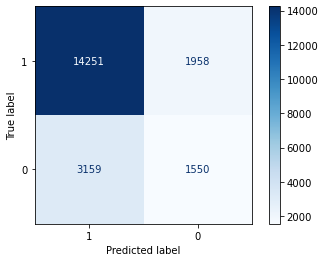

classification report: 
               precision    recall  f1-score   support

           0       0.44      0.33      0.38      4709
           1       0.82      0.88      0.85     16209

    accuracy                           0.76     20918
   macro avg       0.63      0.60      0.61     20918
weighted avg       0.73      0.76      0.74     20918



In [23]:
arvore_decisao_1 = DecisionTreeClassifier(max_depth=12,random_state=11)
arvore_decisao_1 = arvore_decisao_1.fit(X_train,y_train)
y_pred_1 = arvore_decisao_1.predict(X_test)

model_results(arvore_decisao_1,X_test,y_test,y_pred_1)

## Treinamento o modelo Random Forest e os resultados

In [24]:
rf = RandomForestClassifier(random_state=11)
rf = rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

tn: 1812
fp: 2897
fn: 1784
tp: 14425


[[ 1812  2897]
 [ 1784 14425]]


soma tp,fp,fn,tp:  20918
len y_test:  20918


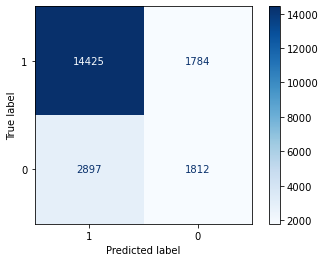

classification report: 
               precision    recall  f1-score   support

           0       0.50      0.38      0.44      4709
           1       0.83      0.89      0.86     16209

    accuracy                           0.78     20918
   macro avg       0.67      0.64      0.65     20918
weighted avg       0.76      0.78      0.76     20918



In [25]:
model_results(rf,X_test,y_test,y_pred_rf)